# DSAI Mini Project
- Samuel Lee Si En (U1920006F)
- Ivan Chay (U1920816B)
- Lee Kai En (U1922980A)
- Melvin Chua Chong Wei (U1921924G)
# Project Flow 
## Problem Statement
*Detect and Predict Epilepsy* - In general, brain anomalies, or epilepsy, can be detected with EEG tests, CT Scans and MRIs. With CT Scans and MRI being costly, it would be good to be able to detect epilepsy with just EEG data. A step up would be to predict before an epilepsy happens.
## Data Preparation
Note: Data preparation is done just before the particular algorithm is needed therefore they take place in all phases of this code.
- **Phase 1 - ** Convert data for binary classification. From 5 classes to 2 classes (Binary Data)
- **Phase 2 - ** Balance Classes
- **Phase 3 - ** Split Data into their individual Classes
- **Phase 4 - ** Feature Engineering 
## Epilepsy Detection
- 5 Fold Validation (Encompases the whole classification)
- Identify 2 models for classification
- Fit models and test accuracy
- Get further accuracy breakdowns with misclassification table
**Process is repeated with balanced classes**
## Tumor Analysis
### Tumor Classification
- An attempt to analyze links between epilepsy and tumor data 
- 5 Fold Validation (Healthy Class and Tumor Class)
- Fit models and test accuracy
- Get further accuracy breakdowns with misclassification table
- Feed epilepsy data into model to find a link between tumor and epilepsy data (IF ACCURACY OF CLASSIFICATION IS GOOD
### Clustering of individual classes 
- An attempt to identify patterns of the eeg bands for each classes
### Clustering of tumor, healthy and eplileptic regions
- An attempt to identify a relationship between epileptic and tumor regions
- Healthy region to act as a neutral
- Successful clustering would allow for prediction of epilepsy
### If clustering successful - Incremental Clustering to predict possible future epilepsy cases
- Incremental Clustering or a form of it
- Euclidean distance

## Data Preparation
- File import 
https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition
- Moving Predictor Y to the first column 
- Removing one column that will not be used
- Splitting X and Y
- Count plot to show breakdown

In [1]:
import os
import graphviz
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

sb.set()
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [2]:
data = pd.read_csv('data.csv')
data.head()

Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

In [3]:
# Extracting Columns
columnNames = []
for column in data.columns:
    if column == "Unnamed: 0":
        continue
    else:
        columnNames.append(column)
print(columnNames)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X1

In [4]:
new_data = pd.DataFrame(data[columnNames])
new_data.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  
3   -77   -85   -77   -72   -69   -65  5  
4   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

In [5]:
# Get List of Columns to Shift Later
columns = new_data.columns.tolist()
columns = [columns[-1]] + columns[:-1]
print(columns)

['y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138'

In [6]:
# Shift Last Column to First
new_data = new_data[columns]
X_columns = new_data.columns.tolist()
X_columns = X_columns[1:]
print(X_columns)
X = pd.DataFrame(new_data[X_columns])
X.head()

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X1

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X169  X170  X171  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...     8   -17   -15   
1  386  382  356  331  320  315  307  272  244  232  ...   168   164   150   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    29    57    64   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -80   -82   -81   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...    10     4     2   

   X172  X173  X174  X175  X176  X177  X178  
0   -31   -77  -103  -127  -116   -83   -51  
1   146   152   157   156   154   143   129  
2    48    19   -12   -30   -35   -35   -36  
3   -80   -77   -85   -77   -72   -69   -65  
4   -12   -32   -41   -65   -83   -89   -73  

[5 rows x 178 columns]

In [7]:
new_data['y'] = (new_data['y'] == 1).astype(int)  # Convert Values into True/False Binary Values
y = pd.DataFrame(new_data['y'])
print(y.head())

   y
0  0
1  1
2  0
3  0
4  0


### Countplot
- Countplot shows breakdown of the binary classes (Epilepsy (1) and No Epilepsy (0))
- It is evident that there are far more non epilepsy cases
- Possible over fitting of model later on
- Suggested class balancing from a 1:4 ratio to 2:4 ratio depending on classification results.

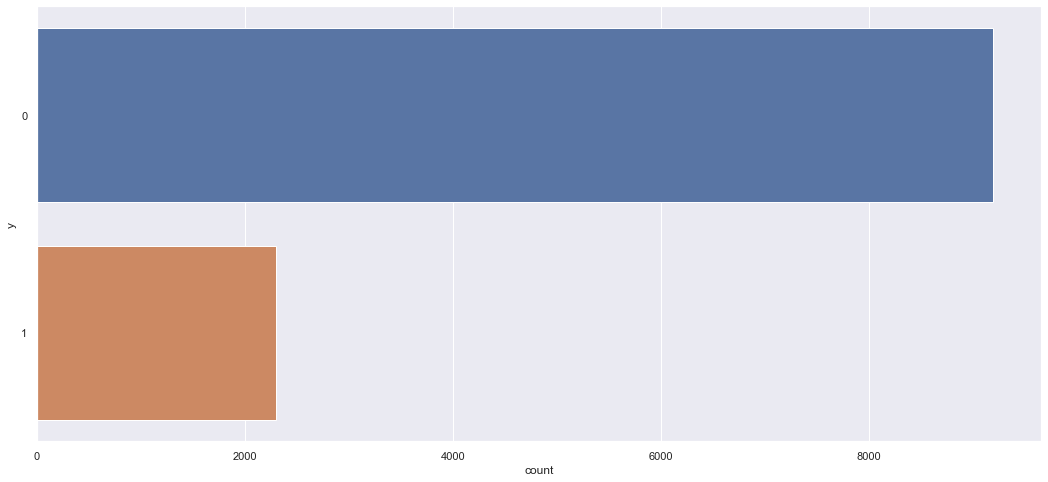

In [8]:
# Countplot
f, axes = plt.subplots(1, 1, figsize=(18, 8))
sb.countplot(y=y["y"])

### Feature Extraction
- Convert eeg signal data (time domain signal) to frequency domain components
- Declare EEG Bands
- Take mean of frequency for each band
- Final Features - 5 Frequency bands per each "signal"
- Extracting Features for 11500 data
- https://dsp.stackexchange.com/questions/45345/how-to-correctly-compute-the-eeg-frequency-bands-with-python

**Histogram below shows an example of the eeg bands for the final signal**

Text(0, 0.5, 'Mean band Amplitude')

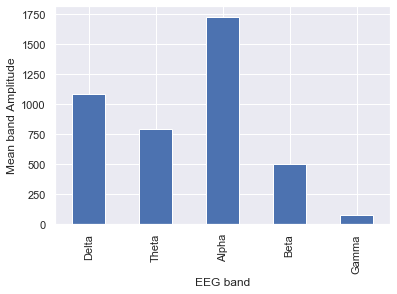

In [9]:
# Extract Power Band Features

X_array = X.values  #0 - 11499
fs = 173.61 #Frequency

# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

rows, cols = (11500, 5) 
count = 0
eeg_band_2dArray = [[0 for i in range(cols)] for j in range(rows)] 
eeg_band_fft = dict()

for i in range (11500):
    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(X_array[i]))
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(X_array[i]), 1.0/fs)
    # Take the mean of the fft amplitude for each EEG band
    for band in eeg_bands: 
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
        eeg_band_2dArray[i][count] =  eeg_band_fft[band] ##################### 
        count+=1
    count = 0
    
# Plot the data
import pandas as pd
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")


## Epilepsy Detection
### 5 Fold Validation - Classification
- Split data into 5 sets (4 sets Training, 1 set test). Loops 5 times changing test each time. 20% and 80%
- Fit models (Decision Tree and Logistic Regression)
- Get accuracy score
- Get accuracy of epilepsy only (From confusion matrixes)
- https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833

Note: Accuracy Results for Test Score only. A prior check was done on training score which consistently is higher than test. For clarity and to truly test the model we are mainly using the test score.

Train Index:  [ 2300  2301  2302 ... 11497 11498 11499]
Test Index:  [   0    1    2 ... 2297 2298 2299] 

Decision Tree Score:  0.9756521739130435
Decision Tree Epilepsy Accuracy:  0.9320175438596491 

Logistic Regression Score:  0.9626086956521739
Logistic Regression Epilepsy Accuracy:  0.8552631578947368 




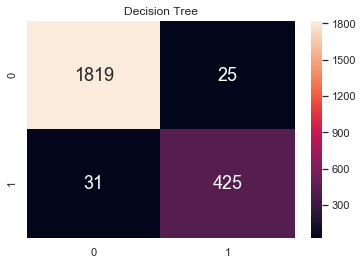

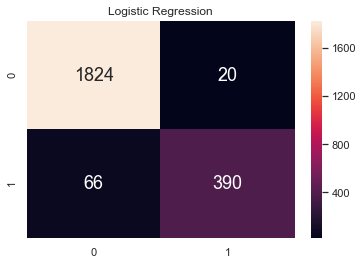

Train Index:  [    0     1     2 ... 11497 11498 11499]
Test Index:  [2300 2301 2302 ... 4597 4598 4599] 

Decision Tree Score:  0.9782608695652174
Decision Tree Epilepsy Accuracy:  0.9555555555555556 

Logistic Regression Score:  0.9645652173913044
Logistic Regression Epilepsy Accuracy:  0.8733333333333333 




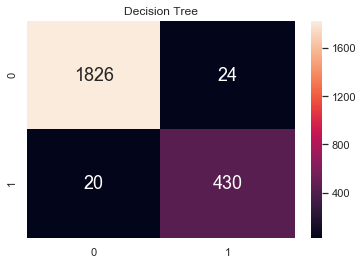

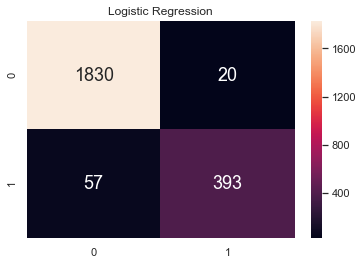

Train Index:  [    0     1     2 ... 11497 11498 11499]
Test Index:  [4600 4601 4602 ... 6897 6898 6899] 

Decision Tree Score:  0.9778260869565217
Decision Tree Epilepsy Accuracy:  0.9487179487179487 

Logistic Regression Score:  0.9659420289855073
Logistic Regression Epilepsy Accuracy:  0.8846153846153846 




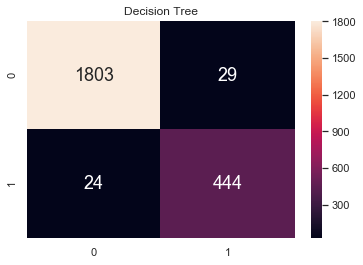

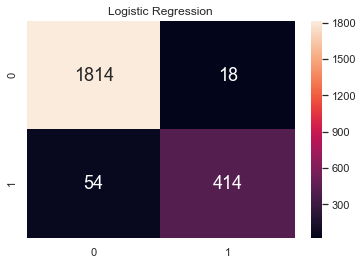

Train Index:  [    0     1     2 ... 11497 11498 11499]
Test Index:  [6900 6901 6902 ... 9197 9198 9199] 

Decision Tree Score:  0.9783695652173913
Decision Tree Epilepsy Accuracy:  0.9457700650759219 

Logistic Regression Score:  0.9665217391304348
Logistic Regression Epilepsy Accuracy:  0.8785249457700651 




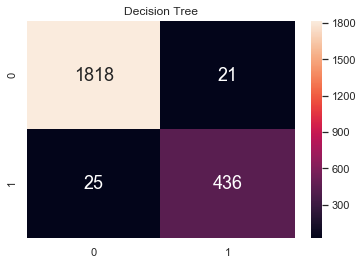

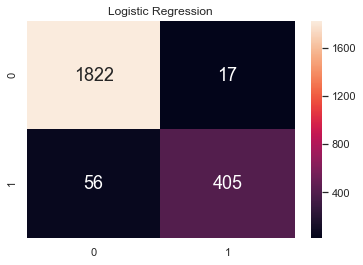

Train Index:  [   0    1    2 ... 9197 9198 9199]
Test Index:  [ 9200  9201  9202 ... 11497 11498 11499] 

Decision Tree Score:  0.978086956521739
Decision Tree Epilepsy Accuracy:  0.9419354838709677 

Logistic Regression Score:  0.9661739130434782
Logistic Regression Epilepsy Accuracy:  0.8666666666666667 




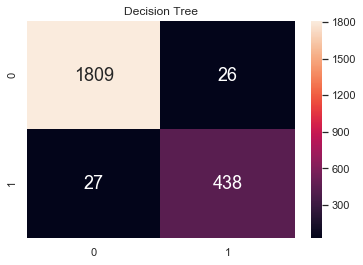

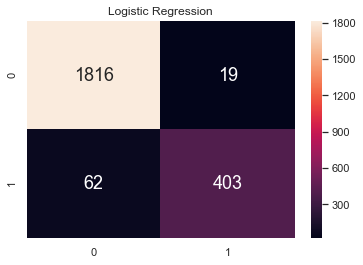

In [10]:
# Create Train and Test from EEG Band Data
eeg_band_2dArray = StandardScaler().fit_transform(eeg_band_2dArray)

# 5 fold cross validation
dectree = DecisionTreeClassifier(max_depth = 4)
rowsTrain, colsTrain = (9200, 5) 
rowsTest, colsTest = (2300, 5)
X_train = [[0 for i in range(colsTrain)] for j in range(rowsTrain)] 
X_test = [[0 for i in range(colsTest)] for j in range(rowsTest)] 

scoresDT = []
epilepsyAccuracyDT = []
calculateEpilepsyAccuracyDT = 0

scoresLR = []
epilepsyAccuracyLR = []
calculateEpilepsyAccuracyLR = 0

yAr = y.values
yAr = np.ravel(yAr)
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(eeg_band_2dArray):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index,"\n")
    X_train, X_test, y_train, y_test = eeg_band_2dArray[train_index], eeg_band_2dArray[test_index], yAr[train_index], yAr[test_index]
    
    #fit decision tree
    dectree.fit(X_train, y_train)
    scoresDT.append(dectree.score(X_test, y_test))
    decisionTreePrediction = dectree.predict(X_test)
    confusionMatrixDT = confusion_matrix(y_test, decisionTreePrediction)
    calculateEpilepsyAccuracyDT = confusionMatrixDT[1][1]/(confusionMatrixDT[1][1]+confusionMatrixDT[1][0])
    epilepsyAccuracyDT.append(calculateEpilepsyAccuracyDT)
    print("Decision Tree Score: ",np.mean(scoresDT))
    print("Decision Tree Epilepsy Accuracy: ",calculateEpilepsyAccuracyDT, "\n")
    
    #fit logistic regression
    clf = LogisticRegression(random_state=0,solver='lbfgs').fit(X_train, y_train)
    scoresLR.append(clf.score(X_test, y_test))
    logisticRegressionPrediction = clf.predict(X_test)
    confusionMatrixLR = confusion_matrix(y_test, logisticRegressionPrediction)
    calculateEpilepsyAccuracyLR = confusionMatrixLR[1][1]/(confusionMatrixLR[1][1]+confusionMatrixLR[1][0])
    epilepsyAccuracyLR.append(calculateEpilepsyAccuracyLR)
    print("Logistic Regression Score: ",np.mean(scoresLR))
    print("Logistic Regression Epilepsy Accuracy: ",calculateEpilepsyAccuracyLR, "\n\n")
    
    
    f, axes = plt.subplots()
    sb.heatmap(confusion_matrix(y_test, decisionTreePrediction),
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title('Decision Tree')
    plt.show()
    
    f, axes = plt.subplots()
    sb.heatmap(confusion_matrix(y_test, logisticRegressionPrediction),
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title('Logistic Regression')
    plt.show()
    

    
    

### Classification Results
- A brief summarized version is provided here (More info above with diagrams)
- In general the accuracy score for the decision tree and logistic regressions are good.
- There is quite a big difference when it comes to epilepsy accuracy of the dec tree and LR (Could be due to the class imbalance of 1 and 0s)
- Good results but suggested to try class balancing.
- Model is able to detect epilepsy (Dec Tree) Avg - 94%
- Model is able to detect epilepsy (LR) Avg - 87%

In [11]:
print("Decision Tree Score: ",scoresDT)
print("Decision Tree Epilepsy Accuracy: ",epilepsyAccuracyDT )
print("Logistic Regression Score: ",scoresLR)
print("Logistic Regression Epilepsy Accuracy: ",epilepsyAccuracyLR)

Decision Tree Score:  [0.9756521739130435, 0.9808695652173913, 0.9769565217391304, 0.98, 0.9769565217391304]
Decision Tree Epilepsy Accuracy:  [0.9320175438596491, 0.9555555555555556, 0.9487179487179487, 0.9457700650759219, 0.9419354838709677]
Logistic Regression Score:  [0.9626086956521739, 0.9665217391304348, 0.9686956521739131, 0.9682608695652174, 0.9647826086956521]
Logistic Regression Epilepsy Accuracy:  [0.8552631578947368, 0.8733333333333333, 0.8846153846153846, 0.8785249457700651, 0.8666666666666667]


### Class Balancing
- Original Ratio 1:4 (Epilepsy:No Epilepsy)
- Balanced to 2:4 (Epilepsy:No Epilepsy)
- Some data removed from each class 2, 3, 4, 5 (tumor, healthy, eyes open, eyes closed) regions. Data removed evenly.
- Original 9200 -> New 6900 (Training Data) Lesser data but more balanced classes
- This is done to avoid the model from always assuming entries to be just non epileptic.

In [12]:
data = pd.read_csv('data.csv')

# Extracting Columns
columnNames = []
for column in data.columns:
    if column == "Unnamed: 0":
        continue
    else:
        columnNames.append(column)
print(columnNames)

new_data_2 = pd.DataFrame(data[columnNames])
new_data_2.head()

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X1

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  
3   -77   -85   -77   -72   -69   -65  5  
4   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

In [13]:
# Epilepsy dataset
class1data = new_data_2.loc[new_data_2['y'] == 1]
# Non-epilepsy dataset
class2data = new_data_2.loc[new_data_2['y'] == 2]
class3data = new_data_2.loc[new_data_2['y'] == 3]
class4data = new_data_2.loc[new_data_2['y'] == 4]
class5data = new_data_2.loc[new_data_2['y'] == 5]

# Split the non-epilepsy dataset randomly for 2:4
class2data1 = class2data.sample(frac=0.5)
class3data1 = class3data.sample(frac=0.5)
class4data1 = class4data.sample(frac=0.5)
class5data1 = class5data.sample(frac=0.5)

data2_4 = pd.concat([class2data1,class3data1,class4data1,class5data1,class1data],ignore_index=True)

# Shuffle Data
data2_4 = data2_4.sample(frac=1).reset_index(drop=True)
print(data2_4)

       X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0     -70  -74  -79  -87  -89  -93  -98 -112 -134 -161  ...    11     6    -2   
1     -40  -42  -45  -44  -39  -38  -44  -62  -89 -124  ...    32    26    24   
2     205  235  268  309  357  412  422  388  355  335  ...    88   138   174   
3     189  203  217  215  201  173  162  156  163  176  ...    26  -411  -784   
4     166  141  106   76   70   91  124  119  106   80  ...    26     4   -52   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
6895  189  174  155  136  118   74   -9 -138 -254 -391  ...  -127   -80   -41   
6896 -117 -113 -106  -93  -72  -63  -71  -97 -121 -131  ...   -14   -47   -81   
6897    1    5    4    5    7    2   -4   -7  -20  -23  ...   -14    -3     0   
6898  -40  -26   -1   20   37   48   60   62   73   90  ...   141   136   127   
6899 -276 -264 -245 -178 -110  -41   24   97  157  202  ...  -487  -438  -393   

      X173  X174  X175  X17

In [14]:
# Get List of Columns to Shift Later
columns2_4 = data2_4.columns.tolist()
columns2_4 = [columns2_4[-1]] + columns2_4[:-1]
print(columns2_4)

# Shift Last Column to First
data2_4 = data2_4[columns2_4]
X_columns_2_4 = data2_4.columns.tolist()
X_columns_2_4 = X_columns_2_4[1:]
print(X_columns_2_4)
X_2_4 = pd.DataFrame(data2_4[X_columns_2_4])
print(X_2_4)

# Convert Values into True/False Binary Values
data2_4['y'] = (data2_4['y'] == 1).astype(int) 
y_2_4 = pd.DataFrame(data2_4['y'])
print(y_2_4)

['y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138'

### Repeat extraction and 5 Fold Validation (Classification Steps)

In [15]:
# Extract Power Band Features

X_array2_4 = X_2_4.values  #0 - 6899
fs = 173.61 # Frequency

# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

rows, cols = (6900, 5) 
count = 0
eeg_band_2dArray2_4 = [[0 for i in range(cols)] for j in range(rows)] 
eeg_band_fft = dict()

for i in range (rows):
    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(X_array2_4[i]))
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(X_array2_4[i]), 1.0/fs)
    # Take the mean of the fft amplitude for each EEG band
    for band in eeg_bands: 
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
        eeg_band_2dArray2_4[i][count] =  eeg_band_fft[band] ##################### 
        count+=1
    count = 0


Train Index:  [1380 1381 1382 ... 6897 6898 6899]
Test Index:  [   0    1    2 ... 1377 1378 1379] 

Decision Tree Score:  0.9768115942028985
Decision Tree Epilepsy Accuracy:  0.9716157205240175 

Logistic Regression Score:  0.9630434782608696
Logistic Regression Epilepsy Accuracy:  0.9148471615720524 




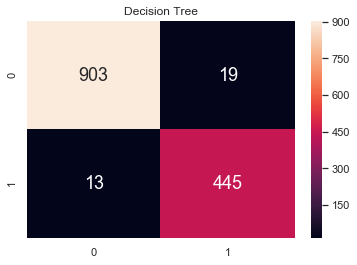

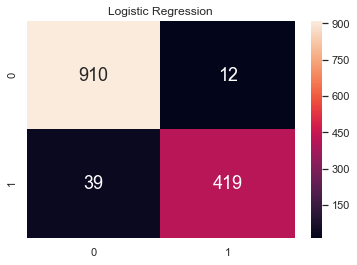

Train Index:  [   0    1    2 ... 6897 6898 6899]
Test Index:  [1380 1381 1382 ... 2757 2758 2759] 

Decision Tree Score:  0.9778985507246376
Decision Tree Epilepsy Accuracy:  0.9734513274336283 

Logistic Regression Score:  0.9648550724637681
Logistic Regression Epilepsy Accuracy:  0.9292035398230089 




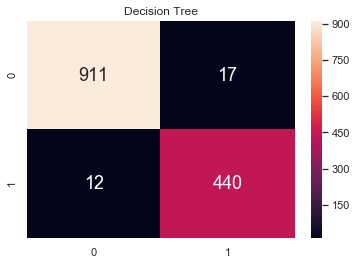

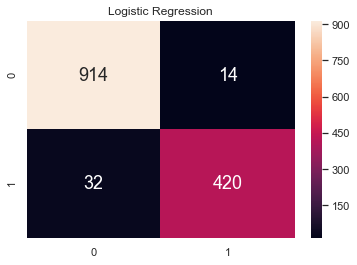

Train Index:  [   0    1    2 ... 6897 6898 6899]
Test Index:  [2760 2761 2762 ... 4137 4138 4139] 

Decision Tree Score:  0.9758454106280192
Decision Tree Epilepsy Accuracy:  0.9634408602150538 

Logistic Regression Score:  0.9673913043478262
Logistic Regression Epilepsy Accuracy:  0.9505376344086022 




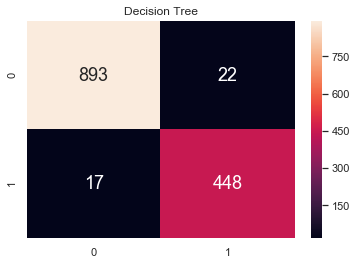

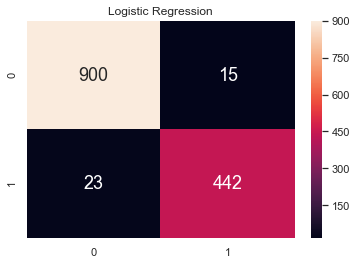

Train Index:  [   0    1    2 ... 6897 6898 6899]
Test Index:  [4140 4141 4142 ... 5517 5518 5519] 

Decision Tree Score:  0.9742753623188405
Decision Tree Epilepsy Accuracy:  0.9574944071588367 

Logistic Regression Score:  0.9648550724637681
Logistic Regression Epilepsy Accuracy:  0.901565995525727 




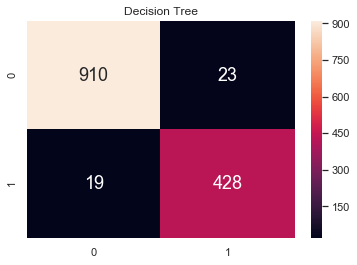

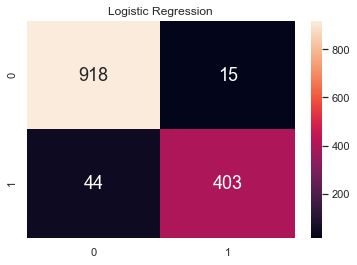

Train Index:  [   0    1    2 ... 5517 5518 5519]
Test Index:  [5520 5521 5522 ... 6897 6898 6899] 

Decision Tree Score:  0.9715942028985506
Decision Tree Epilepsy Accuracy:  0.9644351464435147 

Logistic Regression Score:  0.9640579710144926
Logistic Regression Epilepsy Accuracy:  0.9288702928870293 




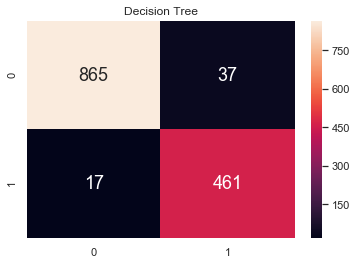

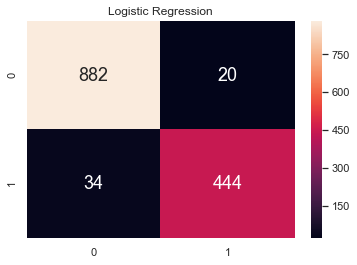

In [16]:
# Create Train and Test from EEG Band Data
eeg_band_2dArray2_4 = StandardScaler().fit_transform(eeg_band_2dArray2_4)

# 5 fold cross validation
dectree = DecisionTreeClassifier(max_depth = 4)
rowsTrain, colsTrain = (5175, 5) 
rowsTest, colsTest = (1725, 5)
X_train = [[0 for i in range(colsTrain)] for j in range(rowsTrain)] 
X_test = [[0 for i in range(colsTest)] for j in range(rowsTest)] 

scoresDT = []
epilepsyAccuracyDT = []
calculateEpilepsyAccuracyDT = 0

scoresLR = []
epilepsyAccuracyLR = []
calculateEpilepsyAccuracyLR = 0

yAr2_4 = y_2_4.values
yAr2_4 = np.ravel(y_2_4)
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(eeg_band_2dArray2_4):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index,"\n")
    X_train, X_test, y_train, y_test = eeg_band_2dArray2_4[train_index], eeg_band_2dArray2_4[test_index], yAr2_4[train_index], yAr2_4[test_index]
    
    #fit decision tree
    dectree.fit(X_train, y_train)
    scoresDT.append(dectree.score(X_test, y_test))
    decisionTreePrediction = dectree.predict(X_test)
    confusionMatrixDT = confusion_matrix(y_test, decisionTreePrediction)
    calculateEpilepsyAccuracyDT = confusionMatrixDT[1][1]/(confusionMatrixDT[1][1]+confusionMatrixDT[1][0])
    epilepsyAccuracyDT.append(calculateEpilepsyAccuracyDT)
    print("Decision Tree Score: ",np.mean(scoresDT))
    print("Decision Tree Epilepsy Accuracy: ",calculateEpilepsyAccuracyDT, "\n")
    
    #fit logistic regression
    clf = LogisticRegression(random_state=0,solver='lbfgs').fit(X_train, y_train)
    scoresLR.append(clf.score(X_test, y_test))
    logisticRegressionPrediction = clf.predict(X_test)
    confusionMatrixLR = confusion_matrix(y_test, logisticRegressionPrediction)
    calculateEpilepsyAccuracyLR = confusionMatrixLR[1][1]/(confusionMatrixLR[1][1]+confusionMatrixLR[1][0])
    epilepsyAccuracyLR.append(calculateEpilepsyAccuracyLR)
    print("Logistic Regression Score: ",np.mean(scoresLR))
    print("Logistic Regression Epilepsy Accuracy: ",calculateEpilepsyAccuracyLR, "\n\n")
    
    f, axes = plt.subplots()
    sb.heatmap(confusion_matrix(y_test, decisionTreePrediction),
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title('Decision Tree')
    plt.show()
    
    f, axes = plt.subplots()
    sb.heatmap(confusion_matrix(y_test, logisticRegressionPrediction),
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title('Logistic Regression')
    plt.show()

    
    
    

    
    

### Balanced Class Classification Results

Decision Tree
- There is an average of a 0.01 drop in accuracy for the total score
- There is an average of a 0.02 increase in accuracy for the epilepsy accuracy

Logistic Regression
- Score remains the same
- There is an average of 0.05 increase in accuracy for the epilepsy accuracy.

As our main focus is on epilepsy accuracy we decided to go with the balanced data due to the increase. An overservation is also made such that logistic regression models do not perform well with imbalanced classes. It is possible to further increase the accuracy but we do not want to reduce the data anymore.

The main model that will be selected is the decision tree model due to the higher accuracy. Also we are able to understand how the splitting works through the diagram below. However the LR model provides a good blackbox back up and confirmation.

**At this point, we are able to accurately detect epilepsy data from an EEG. Any patient that goes through this test and comes up positive for epilepsy AND STILL DOES NOT HAS IT, has a high chance of getting it.** Of course this is mainly just a detector and not so much a predictor. Generally it will only come up positive when a person is really having an epilepsy.

In [17]:
print("Decision Tree Score: ", scoresDT)
print("Decision Tree Epilepsy Accuracy: ", epilepsyAccuracyDT )
print("Logistic Regression Score: ", scoresLR)
print("Logistic Regression Epilepsy Accuracy: ", epilepsyAccuracyLR)
    

Decision Tree Score:  [0.9768115942028985, 0.9789855072463768, 0.9717391304347827, 0.9695652173913043, 0.9608695652173913]
Decision Tree Epilepsy Accuracy:  [0.9716157205240175, 0.9734513274336283, 0.9634408602150538, 0.9574944071588367, 0.9644351464435147]
Logistic Regression Score:  [0.9630434782608696, 0.9666666666666667, 0.972463768115942, 0.9572463768115942, 0.9608695652173913]
Logistic Regression Epilepsy Accuracy:  [0.9148471615720524, 0.9292035398230089, 0.9505376344086022, 0.901565995525727, 0.9288702928870293]


### Fit new balanced dataset into tree and vizualize

As we are already sure of the accuracy our data provides and also have gone through the 5 fold validation to see similar results for all folds, we now fit the full balanced data into the tree model and analyze the splits.



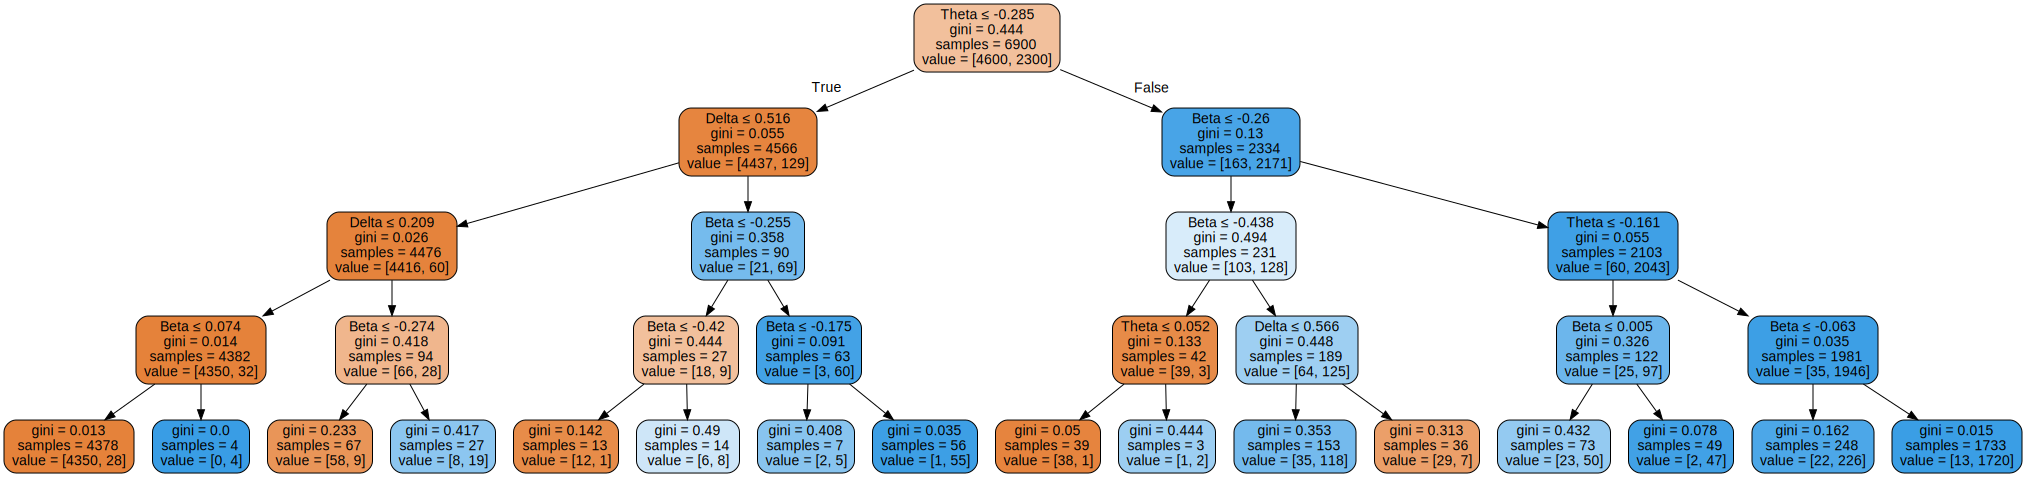

In [18]:
#fit the whole dataset onto the tree
dectree.fit(eeg_band_2dArray2_4, yAr2_4)
# Plot the Decision Tree
eeg_band_names = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = eeg_band_names ,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Decision Tree Analysis
After visualising the decision tree, we found 2 points of interests:

The first one is from this broad overlook of the tree, you will find that the alpha and gamma bands did not appear once in any of the decision nodes, so in a real world setting, excluding these 2 features would likely still yield the same results, saving computational space

The second point of interest is that theta looks to be the most influential frequency band in detecting epilepsy, because it splits between the bulk of the non-epilepsy data points and the bulk of the epilepsy data points, as shown on the slide
In fact, theta is so influential that this one level alone already has a classification accuracy of ~95.5% and a TPR of ~93.5%

## Tumor Analysis
### Perform classification for class 2 and 3 (Tumor and no Tumor)
- Here we try to classify healthy regions and tumor regions of the brain
- Our main goal is to classify accurately and fit the epilepsy data into the model to see if there is a relationship between tumor and epilepsy data.
- Data preperation for the datasets are done below, followed by the usual 5 fold validation and classification.
- Models used are decision tree and support vector machines as they yielded better results as compared to LR or Nearest Neighbours.


In [19]:
# Create Dataset for class 2 and 3
dataTumor = pd.concat([class2data,class3data],ignore_index=True)
#Shuffle Data
dataTumor = dataTumor.sample(frac=1).reset_index(drop=True)
print(dataTumor)

# Get List of Columns to Shift Later
columnsTumor = dataTumor.columns.tolist()
columnsTumor = [columnsTumor[-1]] + columnsTumor[:-1]
print(columnsTumor)

# Shift Last Column to First
dataTumor = dataTumor[columnsTumor]
X_columnsTumor = dataTumor.columns.tolist()
X_columnsTumor = X_columnsTumor[1:]
print(X_columnsTumor)
X_Tumor = pd.DataFrame(dataTumor[X_columnsTumor])
print(X_Tumor)

dataTumor['y'] = (dataTumor['y'] == 2).astype(int) 
y_Tumor = pd.DataFrame(dataTumor['y'])
y_Tumor

      X1  X2   X3   X4   X5  X6  X7  X8  X9  X10  ...  X170  X171  X172  X173  \
0    -39 -39  -39  -33  -23 -15  -2  -1   0   -8  ...   -22   -21   -21   -25   
1    -35 -29  -21  -11  -13  -7   6  25  26   18  ...    71    60    51    31   
2     -1  -2    2    1    3  -1  -5   1   2   -4  ...    29    16     9    -2   
3     -9  -1  -11  -25  -25 -32 -25 -17   0   16  ...    12    30    40    54   
4     -1   0   -2   -3   -1  -4 -10 -13 -15  -15  ...     7     7     0    -2   
...   ..  ..  ...  ...  ...  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...   
4595 -25 -28  -34  -44  -61 -68 -71 -71 -80  -89  ...   -16   -13     3    15   
4596  48  47   40   33   25  19  12   7   6    8  ...    13    14    14    18   
4597 -16 -17  -21  -19  -15  -7  -5  -1   3    5  ...    23    22    26    26   
4598 -93 -62  -50  -45  -37 -21   7   9   7   -4  ...    -4    -5   -26   -34   
4599 -69 -92 -110 -109 -100 -68 -46 -34 -34   -2  ...   -21    11    -8   -31   

      X174  X175  X176  X17

y
0     0
1     1
2     0
3     1
4     0
...  ..
4595  1
4596  1
4597  1
4598  1
4599  0

[4600 rows x 1 columns]

In [20]:
# Extract Power Band Features

X_arrayTumor = X_Tumor.values
fs = 173.61 # Frequency

# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

rows, cols = (4600, 5) 
count = 0
eeg_band_2dArrayTumor = [[0 for i in range(cols)] for j in range(rows)] 
eeg_band_fft = dict()

for i in range (rows):
    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(X_arrayTumor[i]))
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(X_arrayTumor[i]), 1.0/fs)
    # Take the mean of the fft amplitude for each EEG band
    for band in eeg_bands: 
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
        eeg_band_2dArrayTumor[i][count] =  eeg_band_fft[band] ##################### 
        count+=1
    count = 0


Decision Tree Score:  0.6228260869565218
Decision Tree Tumor Accuracy:  0.505307855626327 

Support Vector Machines Score:  0.6510869565217391
Support Vector Machines Tumor Accuracy:  0.5881104033970276 




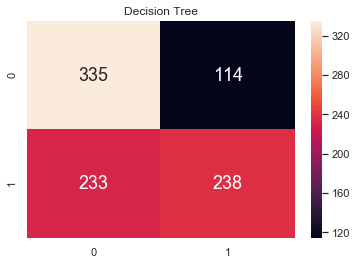

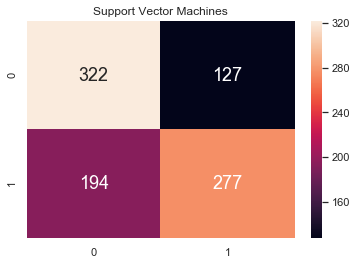

Decision Tree Score:  0.6217391304347826
Decision Tree Tumor Accuracy:  0.7142857142857143 

Support Vector Machines Score:  0.6434782608695653
Support Vector Machines Tumor Accuracy:  0.5604395604395604 




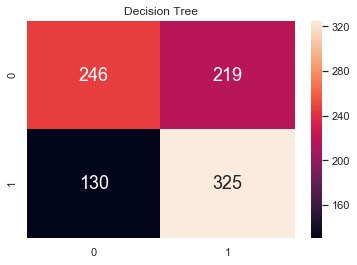

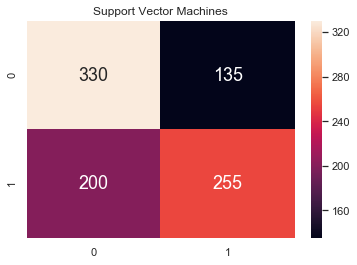

Decision Tree Score:  0.6047101449275362
Decision Tree Tumor Accuracy:  0.6865671641791045 

Support Vector Machines Score:  0.6297101449275363
Support Vector Machines Tumor Accuracy:  0.6908315565031983 




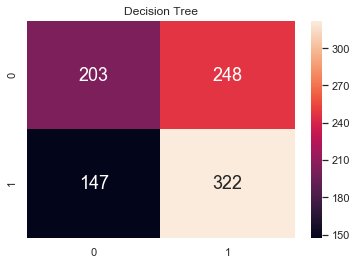

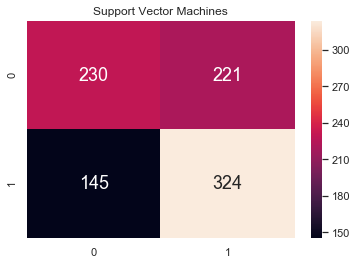

Decision Tree Score:  0.6070652173913043
Decision Tree Tumor Accuracy:  0.3248259860788863 

Support Vector Machines Score:  0.6315217391304349
Support Vector Machines Tumor Accuracy:  0.6682134570765661 




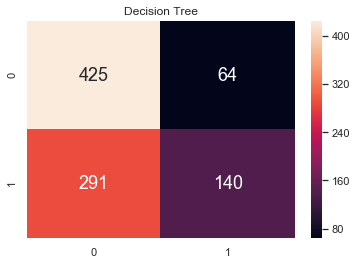

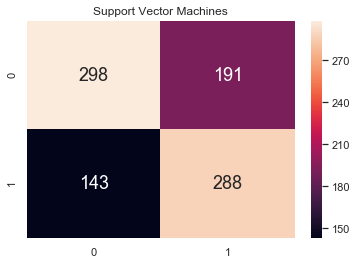

Decision Tree Score:  0.6004347826086956
Decision Tree Tumor Accuracy:  0.6708860759493671 

Support Vector Machines Score:  0.6304347826086957
Support Vector Machines Tumor Accuracy:  0.5949367088607594 




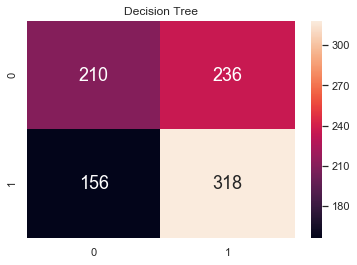

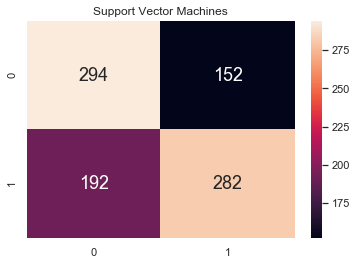

In [52]:
# Create Train and Test from EEG Band Data
eeg_band_2dArrayTumor = StandardScaler().fit_transform(eeg_band_2dArrayTumor)

# 5 fold cross validation
dectree = DecisionTreeClassifier(max_depth = 4)
rowsTrain, colsTrain = (3450, 5) 
rowsTest, colsTest = (1150, 5)
X_train = [[0 for i in range(colsTrain)] for j in range(rowsTrain)] 
X_test = [[0 for i in range(colsTest)] for j in range(rowsTest)] 

scoresDT = []
tumorAccuracyDT = []
calculateTumorAccuracyDT = 0

scoresSVM = []
tumorAccuracySVM = []
calculateTumorAccuracySVM = 0

yArTumor = y_Tumor.values
yArTumor = np.ravel(y_Tumor)
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(eeg_band_2dArrayTumor):
    #print("Train Index: ", train_index)
    #print("Test Index: ", test_index,"\n")
    X_train, X_test, y_train, y_test = eeg_band_2dArrayTumor[train_index], eeg_band_2dArrayTumor[test_index], yArTumor[train_index], yArTumor[test_index]
    
    #fit decision tree
    dectree.fit(X_train, y_train)
    scoresDT.append(dectree.score(X_test, y_test))
    decisionTreePrediction = dectree.predict(X_test)
    confusionMatrixDT = confusion_matrix(y_test, decisionTreePrediction)
    calculateTumorAccuracyDT = confusionMatrixDT[1][1]/(confusionMatrixDT[1][1]+confusionMatrixDT[1][0])
    tumorAccuracyDT.append(calculateTumorAccuracyDT)
    print("Decision Tree Score: ",np.mean(scoresDT))
    print("Decision Tree Tumor Accuracy: ",calculateTumorAccuracyDT, "\n")
    
    #fit logistic regression
    #clf = LogisticRegression(random_state=0,solver='lbfgs').fit(X_train, y_train)
    clf = svm.NuSVC(gamma='auto')
    clf.fit(X_train, y_train)
    scoresSVM.append(clf.score(X_test, y_test))
    SVMPrediction = clf.predict(X_test)
    confusionMatrixSVM = confusion_matrix(y_test, SVMPrediction)
    calculateTumorAccuracySVM = confusionMatrixSVM[1][1]/(confusionMatrixSVM[1][1]+confusionMatrixSVM[1][0])
    tumorAccuracySVM.append(calculateTumorAccuracySVM)
    print("Support Vector Machines Score: ",np.mean(scoresSVM))
    print("Support Vector Machines Tumor Accuracy: ",calculateTumorAccuracySVM, "\n\n")
    
    f, axes = plt.subplots()
    sb.heatmap(confusion_matrix(y_test, decisionTreePrediction),
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title('Decision Tree')
    plt.show()
    
    f, axes = plt.subplots()
    sb.heatmap(confusion_matrix(y_test, SVMPrediction),
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title('Support Vector Machines')
    plt.show()
    


### Tumor Classification Results
- As seen from the results, the accuracy on both models are low. Even in the decent accuracies, they fluctuate alot for each fold. 
- Due to this we are unable to use the model to fit the epilepsy data.

In [53]:
print("Decision Tree Score: ", scoresDT)
print("Decision Tree Tumor Accuracy: ", tumorAccuracyDT )
print("SVM Score: ", scoresSVM)
print("SVM Tumor Accuracy: ", tumorAccuracySVM)

Decision Tree Score:  [0.6228260869565218, 0.6206521739130435, 0.5706521739130435, 0.6141304347826086, 0.5739130434782609]
Decision Tree Tumor Accuracy:  [0.505307855626327, 0.7142857142857143, 0.6865671641791045, 0.3248259860788863, 0.6708860759493671]
SVM Score:  [0.6510869565217391, 0.6358695652173914, 0.6021739130434782, 0.6369565217391304, 0.6260869565217392]
SVM Tumor Accuracy:  [0.5881104033970276, 0.5604395604395604, 0.6908315565031983, 0.6682134570765661, 0.5949367088607594]


### Clustering of Individual Classes 
- K means clustering is done for 3 classes (Epileptic, tumor and healthy regions)
- Data preperation to seperate the classes is also done here
- The elbow graph is used to decide the number of clusters
- We are trying to find a general trend of the classes and their eeg bands.
- The method used for all classes are the same.

**NOTE: Clusters might change for each run of the code. However the trends would still be the same. If the cluster refered to by the comments seem to be talking about another cluster it is most likely due to the above-mentioned reason. However, the trends would still be the same.**

### Clustering Class 1: Recording of Seizure Activity

In [22]:
class1data

X1   X2   X3   X4   X5   X6   X7   X8   X9   X10  ...  X170  X171  \
1      386  382  356  331  320  315  307  272  244   232  ...   164   150   
8     -278 -246 -215 -191 -177 -167 -157 -139 -118   -92  ...  -400  -379   
11    -167 -230 -280 -315 -338 -369 -405 -392 -298  -140  ...   423   434   
20     410  451  491  541  581  641  736  757  692   435  ...   415   428   
22    -264 -189 -117  -45   20   70  111  143  161   179  ...  -231  -221   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
11487   98  107  121  143  166  184  185  174  153   132  ...   -31    11   
11488  267  409  450  416  334  248  173  113   67    30  ...   413   288   
11490  -22  -64 -121 -201 -292 -336 -398 -527 -773 -1069  ...   183  -152   
11492  -27  -53  -84 -104 -131 -171 -199 -203 -177  -142  ...  -127  -114   
11496  -47  -11   28   77  141  211  246  240  193   136  ...   -65   -33   

       X172  X173  X174  X175  X176  X177  X178  y  
1       146   152   157   156   154   143   129  1  
8      -336  -281  -226  -174  -125   -79   -40  1  
11      416   374   319   268   215   165   103  1  
20      463   510   562   607   667   748   763  1  
22     -248  -321  -444  -530  -548  -536  -486  1  
...     ...   ...   ...   ...   ...   ...   ... ..  
11487    48    77    95   107   111   110   119  1  
11488   173    76     7   -27   -46   -58   -67  1  
11490  -499  -577  -415  -223   -88   -18   -61  1  
11492   -99   -79   -56   -28   -14    -8   -12  1  
11496    -7    14    27    48    77   117   170  1  

[2300 rows x 179 columns]

In [23]:
# Extract Power Band Features

class1_array = class1data.values
fs = 173.61 # Frequency

# Define EEG bands
eegBands_class1 = {'Delta': (0, 4),
                     'Theta': (4, 8),
                     'Alpha': (8, 12),
                     'Beta': (12, 30),
                     'Gamma': (30, 45)}

rows, cols = (2300, 5) 
count = 0
eegBand_class1_2dArray = [[0 for i in range(cols)] for j in range(rows)] 
eegBand_class1_fft = dict()

for i in range (2300):
    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(class1_array[i]))
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(class1_array[i]), 1.0/fs)
    # Take the mean of the fft amplitude for each EEG band
    for band in eegBands_class1: 
        freq_ix = np.where((fft_freq >= eegBands_class1[band][0]) & 
                           (fft_freq <= eegBands_class1[band][1]))[0]
        eegBand_class1_fft[band] = np.mean(fft_vals[freq_ix])
        eegBand_class1_2dArray[i][count] = eegBand_class1_fft[band] ##################### 
        count+=1
    count = 0

In [24]:
# Create Train and Test from EEG Band Data
eegBand_class1_2dArray = StandardScaler().fit_transform(eegBand_class1_2dArray)
trainRows, trainCols = (1725, 5) 
testRows, testCols = (575,5)

eeg_band_train = [[0 for i in range(trainCols)] for j in range(trainRows)] 
eeg_band_test = [[0 for i in range(testCols)] for j in range(testRows)] 

# training data 0 - 1725
for i in range(1725):
    for j in range (5):
        eeg_band_train[i][j] = eegBand_class1_2dArray[i][j]
        
# test data 1725 - 2300 (0 - 1725)
for i in range (1725, 2300):
    for j in range (5):
        eeg_band_test[i-2300][j] = eegBand_class1_2dArray[i][j]
    
# Checking Values
print(eeg_band_train[1724]) 
print(eegBand_class1_2dArray[1724])
print(eeg_band_test[574])
print(eegBand_class1_2dArray[2299])
print()

# Convert feature extraction array into a Pandas DataFrame
eegBands_class1_df = pd.DataFrame.from_records(eegBand_class1_2dArray, columns = ["Delta","Theta","Alpha","Beta","Gamma"])

print(eegBands_class1_df)

[1.7542980294244983, 0.15168272347523742, -0.45521701908211787, 0.36251918193817345, 0.6058690143609631]
[ 1.75429803  0.15168272 -0.45521702  0.36251918  0.60586901]
[-0.8801155218383527, -0.3844242435208778, -0.6066320017222674, -0.8990676616835379, -0.8811240005023872]
[-0.88011552 -0.38442424 -0.606632   -0.89906766 -0.881124  ]

         Delta     Theta     Alpha      Beta     Gamma
0     2.094737  0.929002  0.182381  0.712165  0.197912
1    -0.576690 -0.587667 -0.581292 -0.793004 -0.765605
2     0.434218  0.599428  0.165403 -0.460797 -1.036947
3     0.141894  2.663841  1.825723 -0.041008  0.379983
4    -0.303380 -0.673836 -0.917801 -0.857454 -0.535572
...        ...       ...       ...       ...       ...
2295 -0.741595 -0.383753 -0.426468 -0.808653 -0.991538
2296 -0.183905 -0.939076 -0.141216 -0.319038 -0.437927
2297  1.642794 -0.791279  0.080676  0.911542  0.915540
2298 -1.012270 -0.697956 -0.720341 -0.944550 -1.119031
2299 -0.880116 -0.384424 -0.606632 -0.899068 -0.881124

[23

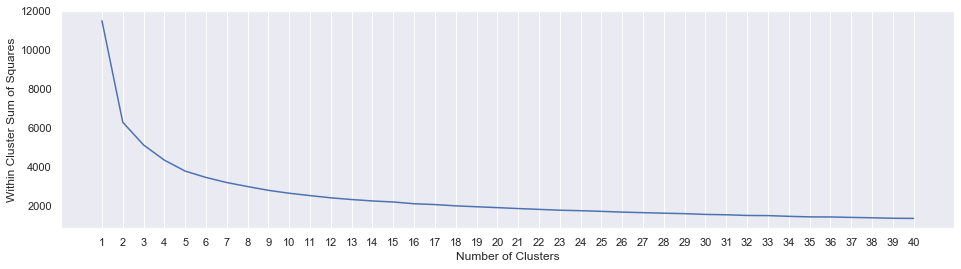

In [25]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(eegBands_class1_df)
    within_ss.append(kmeans.inertia_)
    
# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

### Cluster Breakdown
- We can see a majority of the data is in clusters 1 and 3, therefore we will be focusing on these 2 clusters.


Cluster 0:	0.77	0.2	0.77	2.04	1.9	
Cluster 1:	-0.5	-0.86	-0.83	-0.73	-0.74	
Cluster 2:	0.12	1.78	1.79	0.71	0.71	
Cluster 3:	-0.39	0.34	-0.02	-0.24	-0.15	
Cluster 4:	1.75	0.28	0.47	0.45	0.37	

Within Cluster Sum of Squares : 3768.1177203823972

DataFrame with Clusters
         Delta     Theta     Alpha      Beta     Gamma Cluster
0     2.094737  0.929002  0.182381  0.712165  0.197912       4
1    -0.576690 -0.587667 -0.581292 -0.793004 -0.765605       1
2     0.434218  0.599428  0.165403 -0.460797 -1.036947       3
3     0.141894  2.663841  1.825723 -0.041008  0.379983       2
4    -0.303380 -0.673836 -0.917801 -0.857454 -0.535572       1
...        ...       ...       ...       ...       ...     ...
2295 -0.741595 -0.383753 -0.426468 -0.808653 -0.991538       1
2296 -0.183905 -0.939076 -0.141216 -0.319038 -0.437927       1
2297  1.642794 -0.791279  0.080676  0.911542  0.915540       4
2298 -1.012270 -0.697956 -0.720341 -0.944550 -1.119031       1
2299 -0.880116 -0.384424 -0.606632 -0.8

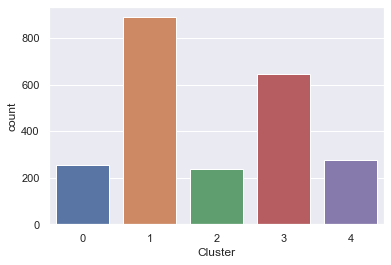

In [26]:
num_clust = 5

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(eegBands_class1_df)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(eegBands_class1_df)

# Append Labels to the Data
eegBand_class1_labeled = eegBands_class1_df.copy()
eegBand_class1_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(eegBand_class1_labeled["Cluster"])

print("DataFrame with Clusters")
print(eegBand_class1_labeled)

### Cluster Class 1 Analysis - Epileptic Data
- In general we see that 1 and 3 seem to be quite moderate to low in terms of the bands.
- Clusters 4 is also generally moderate
- Cluster 2 has a higher trend towards Theta and Alpha
- Cluster 0 has a higher trend towards Beta

Though cluster 0 and 2 might not be a majority it might serve to provide some insights on the uniqueness of each seizure/epiepsy. However in general we can say that the epilepsy frequency bands are more or less moderate/ in the middle.

In [27]:
# Visualizing Clusters with Parallel Plot
import plotly.express as px

fig = px.parallel_coordinates(eegBand_class1_labeled, color = "Cluster", 
                              labels={"Gamma": "Gamma", "Delta": "Delta", "Alpha": "Alpha",
                                      "Beta": "Beta", "Theta": "Theta", },
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

### Clustering Class 2: EEG activity was recorded from area where tumour was located


In [28]:
class2data

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  \
7        1   -2   -8  -11  -12  -17  -15  -16  -18  -17  ...   -79   -91   
14     -24  -15   -5   -1    4    3    6   10   11    7  ...    32    35   
16      39   41   41   42   43   43   46   47   49   50  ...    43    41   
19       4   24   51   76   92  102  104  101   90   80  ...     3     5   
21     -24  -27  -23  -28  -34  -40  -47  -43  -38  -23  ...   -81   -51   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
11479   62   68   75   75   75   77   81   85   82   81  ...    -1    -2   
11484  -18  -12   -5   -4   -3   -9  -16  -27  -35  -49  ...   -63   -58   
11491  102  137  158  158  128   92   60   56   63   63  ...    76    64   
11493 -136 -137 -138 -135 -130 -123 -116 -118 -119 -119  ...    -1     3   
11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    15    16   

       X172  X173  X174  X175  X176  X177  X178  y  
7       -97   -88   -76   -72   -66   -57   -39  2  
14       36    34    32    26    23    18    20  2  
16       41    43    43    40    41    41    49  2  
19       10    19    31    36    40    43    36  2  
21      -38   -11   -12     4     5    -4    -3  2  
...     ...   ...   ...   ...   ...   ...   ... ..  
11479    -1     9    18    22    30    36    41  2  
11484   -51   -48   -41   -30   -26   -17   -17  2  
11491    59    44    39    23    11     4     2  2  
11493     5     8    13    16    24    34    42  2  
11495    12     5    -1   -18   -37   -47   -48  2  

[2300 rows x 179 columns]

In [29]:
# Extract Power Band Features

class2_array = class2data.values  # only class 2 & 3 values
fs = 173.61 # Frequency

# Define EEG bands
eegBands_class2 = {'Delta': (0, 4),
                     'Theta': (4, 8),
                     'Alpha': (8, 12),
                     'Beta': (12, 30),
                     'Gamma': (30, 45)}

rows, cols = (2300, 5) 
count = 0
eegBand_class2_2dArray = [[0 for i in range(cols)] for j in range(rows)] 
eegBand_class2_fft = dict()

for i in range (2300):
    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(class2_array[i]))
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(class2_array[i]), 1.0/fs)
    # Take the mean of the fft amplitude for each EEG band
    for band in eegBands_class2: 
        freq_ix = np.where((fft_freq >= eegBands_class2[band][0]) & 
                           (fft_freq <= eegBands_class2[band][1]))[0]
        eegBand_class2_fft[band] = np.mean(fft_vals[freq_ix])
        eegBand_class2_2dArray[i][count] = eegBand_class2_fft[band] ##################### 
        count+=1
    count = 0


In [30]:
# Create Train and Test from EEG Band Data
eegBand_class2_2dArray = StandardScaler().fit_transform(eegBand_class2_2dArray)
trainRows, trainCols = (1725, 5) 
testRows, testCols = (575,5)

eeg_band_train = [[0 for i in range(trainCols)] for j in range(trainRows)] 
eeg_band_test = [[0 for i in range(testCols)] for j in range(testRows)] 

# training data 0 - 1725
for i in range(1725):
    for j in range (5):
        eeg_band_train[i][j] = eegBand_class2_2dArray[i][j]
        
# test data 1725 - 2300 (0 - 1725)
for i in range (1725, 2300):
    for j in range (5):
        eeg_band_test[i-2300][j] = eegBand_class2_2dArray[i][j]
    
# Checking Values
print(eeg_band_train[1724]) 
print(eegBand_class2_2dArray[1724])
print(eeg_band_test[574])
print(eegBand_class2_2dArray[2299])
print()

# Convert feature extraction array into a Pandas DataFrame
eegBands_class2_df = pd.DataFrame.from_records(eegBand_class2_2dArray, columns = ["Delta","Theta","Alpha","Beta","Gamma"])

print(eegBands_class2_df)

[3.3031145352290108, 3.184253706960285, 2.9959249000661607, 2.906113333156324, 1.058817230339716]
[3.30311454 3.18425371 2.9959249  2.90611333 1.05881723]
[-0.5389798433659778, -0.3334490945820883, -0.6938073383334064, -0.6713568263935685, -0.3965027405500078]
[-0.53897984 -0.33344909 -0.69380734 -0.67135683 -0.39650274]

         Delta     Theta     Alpha      Beta     Gamma
0    -0.169364 -0.650074 -0.612281 -0.600043 -0.345673
1    -0.353801 -0.406266 -0.435960 -0.571191 -0.540214
2    -0.290879 -0.637586 -0.732275 -0.817771 -0.522433
3     0.213137  0.716407  0.092116  0.010941 -0.529489
4    -0.445108 -0.281353 -0.052806 -0.184674 -0.291904
...        ...       ...       ...       ...       ...
2295 -0.243113 -0.529141 -0.722643 -0.721974 -0.454704
2296 -0.578622  0.101830 -0.519758 -0.561765 -0.668333
2297  0.327023 -0.615160  0.110197  0.393591 -0.141506
2298 -0.001851 -0.557218 -0.232795 -0.176515  0.286847
2299 -0.538980 -0.333449 -0.693807 -0.671357 -0.396503

[2300 rows x 5 

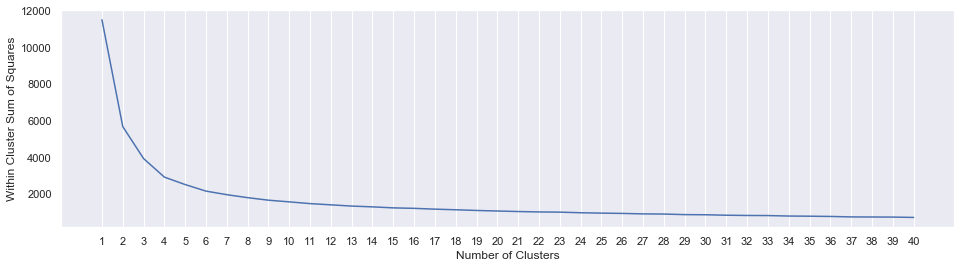

In [31]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(eegBands_class2_df)
    within_ss.append(kmeans.inertia_)
    
# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

### Cluster Breakdown
- We can see a clear distinction of clusters 0 and 2 to be the majority.

Cluster 0:	0.05	0.11	0.24	0.15	0.11	
Cluster 1:	6.49	6.85	6.41	5.25	5.55	
Cluster 2:	-0.41	-0.43	-0.52	-0.5	-0.41	
Cluster 3:	2.66	2.34	2.52	2.94	2.77	
Cluster 4:	1.01	1.0	1.06	1.39	0.86	

Within Cluster Sum of Squares : 2497.4803625438535

DataFrame with Clusters
         Delta     Theta     Alpha      Beta     Gamma Cluster
0    -0.169364 -0.650074 -0.612281 -0.600043 -0.345673       2
1    -0.353801 -0.406266 -0.435960 -0.571191 -0.540214       2
2    -0.290879 -0.637586 -0.732275 -0.817771 -0.522433       2
3     0.213137  0.716407  0.092116  0.010941 -0.529489       0
4    -0.445108 -0.281353 -0.052806 -0.184674 -0.291904       2
...        ...       ...       ...       ...       ...     ...
2295 -0.243113 -0.529141 -0.722643 -0.721974 -0.454704       2
2296 -0.578622  0.101830 -0.519758 -0.561765 -0.668333       2
2297  0.327023 -0.615160  0.110197  0.393591 -0.141506       0
2298 -0.001851 -0.557218 -0.232795 -0.176515  0.286847       0
2299 -0.538980 -0.333449 -0.693807 -0.6713

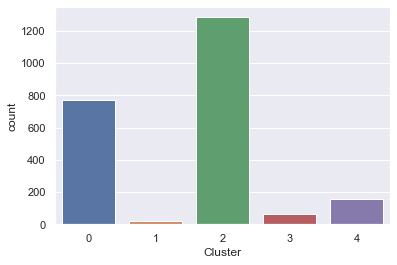

In [32]:
num_clust = 5

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(eegBands_class2_df)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(eegBands_class2_df)

# Append Labels to the Data
eegBand_class2_labeled = eegBands_class2_df.copy()
eegBand_class2_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(eegBand_class2_labeled["Cluster"])

print("DataFrame with Clusters")
print(eegBand_class2_labeled)

### Cluster Class 2 Analysis - Tumor Region
- Clusters 0 and 2 have very low frequency bands
- In general all clusters have low frequency bands except for cluster 1.
- Cluster 1 seems to be on the higher side but with some fluctuation.

The main trend of the tumor region is low frequency bands with cluster 1 a slight anomaly having higher band waves.

In [33]:
# Visualizing Clusters with Parallel Plot
import plotly.express as px

fig = px.parallel_coordinates(eegBand_class2_labeled, color = "Cluster", 
                              labels={"Gamma": "Gamma", "Delta": "Delta", "Alpha": "Alpha",
                                      "Beta": "Beta", "Theta": "Theta", },
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

### Clustering Class 3: EEG activity was recorded from same area as Class 2 but with a healthy brain instead

In [34]:
class3data

X1   X2   X3   X4   X5   X6   X7  X8  X9  X10  ...  X170  X171  X172  \
12      92   49    0  -32  -51  -65  -37 -19 -25  -29  ...   -56   -41   -40   
15    -135 -133 -125 -118 -111 -105 -102 -93 -94  -90  ...   -49   -39   -35   
17       9    4   -5  -10  -22  -30  -33 -43 -41  -40  ...    34    27    22   
25     -16  -15  -19  -16  -14   -5    0  -1  -3   -5  ...    56    56    62   
35      90   60   56   50   -6  -30  -48 -48 -19    9  ...   -50   -51   -48   
...    ...  ...  ...  ...  ...  ...  ...  ..  ..  ...  ...   ...   ...   ...   
11472  -61  -71  -77  -74  -74  -72  -72 -76 -77  -76  ...   -51   -58   -68   
11475  -68  -43  -24   -3  -15  -16  -15 -17 -19  -29  ...    87    88    90   
11483    7   30   16   10   17   23   42  31  34   39  ...   190   152   132   
11494  -39  -16  -13  -14  -68  -84  -92 -61 -89  -86  ...  -102   -75   -63   
11498  -40  -25   -9  -12   -2   12    7  19  22   29  ...   121   135   148   

       X173  X174  X175  X176  X177  X178  y  
12      -43   -32   -13    -1    -7   -44  3  
15      -29   -10     4    21    31    37  3  
17       18    15    13     9     9     3  3  
25       54    53    53    50    57    54  3  
35        1    -1    27     2    -6    12  3  
...     ...   ...   ...   ...   ...   ... ..  
11472   -88   -98  -101  -102   -99   -96  3  
11475    91    96    98   102   100    91  3  
11483   104    56    41    63   126   193  3  
11494   -44   -66   -49   -34   -31   -52  3  
11498   143   116    86    68    59    55  3  

[2300 rows x 179 columns]

In [35]:
#Extract Power Band Features

class3_array = class3data.values  # only class 2 & 3 values
fs = 173.61 # Frequency

# Define EEG bands
eegBands_class3 = {'Delta': (0, 4),
                     'Theta': (4, 8),
                     'Alpha': (8, 12),
                     'Beta': (12, 30),
                     'Gamma': (30, 45)}

rows, cols = (2300, 5) 
count = 0
eegBand_class3_2dArray = [[0 for i in range(cols)] for j in range(rows)] 
eegBand_class3_fft = dict()

for i in range (2300):
    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(class3_array[i]))
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(class3_array[i]), 1.0/fs)
    # Take the mean of the fft amplitude for each EEG band
    for band in eegBands_class3: 
        freq_ix = np.where((fft_freq >= eegBands_class3[band][0]) & 
                           (fft_freq <= eegBands_class3[band][1]))[0]
        eegBand_class3_fft[band] = np.mean(fft_vals[freq_ix])
        eegBand_class3_2dArray[i][count] = eegBand_class3_fft[band] ##################### 
        count+=1
    count = 0


In [36]:
# Create Train and Test from EEG Band Data
eegBand_class3_2dArray = StandardScaler().fit_transform(eegBand_class3_2dArray)
trainRows, trainCols = (1725, 5) 
testRows, testCols = (575,5)

eeg_band_train = [[0 for i in range(trainCols)] for j in range(trainRows)] 
eeg_band_test = [[0 for i in range(testCols)] for j in range(testRows)] 

# training data 0 - 1725
for i in range(1725):
    for j in range (5):
        eeg_band_train[i][j] = eegBand_class3_2dArray[i][j]
        
# test data 1725 - 2300 (0 - 1725)
for i in range (1725, 2300):
    for j in range (5):
        eeg_band_test[i-2300][j] = eegBand_class3_2dArray[i][j]
    
# Checking Values
print(eeg_band_train[1724]) 
print(eegBand_class3_2dArray[1724])
print(eeg_band_test[574])
print(eegBand_class3_2dArray[2299])
print()

# Convert feature extraction array into a Pandas DataFrame
eegBands_class3_df = pd.DataFrame.from_records(eegBand_class3_2dArray, columns = ["Delta","Theta","Alpha","Beta","Gamma"])

print(eegBands_class3_df)

[-1.0095045387048316, -0.41382231986480217, -0.35437936084078275, -0.6928419722063865, -0.7955438612199297]
[-1.00950454 -0.41382232 -0.35437936 -0.69284197 -0.79554386]
[1.0708359118884514, 0.9295995383660105, 0.30762771523981547, 0.5732942077479771, 0.11300108092445667]
[1.07083591 0.92959954 0.30762772 0.57329421 0.11300108]

         Delta     Theta     Alpha      Beta     Gamma
0     2.571132  1.002036  0.888819  1.032569  2.193982
1    -0.255350  0.806711  0.397403  0.174222  0.452493
2    -1.659535  0.972491 -0.324135 -0.669616 -1.185950
3    -0.843744 -0.934869 -0.959203 -0.680897 -0.564248
4     2.567724  0.923711  1.867364  2.859994  1.599160
...        ...       ...       ...       ...       ...
2295  1.241687 -0.749358 -0.645419 -0.277003  0.039116
2296 -0.290475  1.901855  0.463470  0.936089  0.915776
2297  1.730445  0.987851  3.465574  2.204326  4.193062
2298  1.346509 -0.475205  0.478601  1.303491  1.838581
2299  1.070836  0.929600  0.307628  0.573294  0.113001

[2300 ro

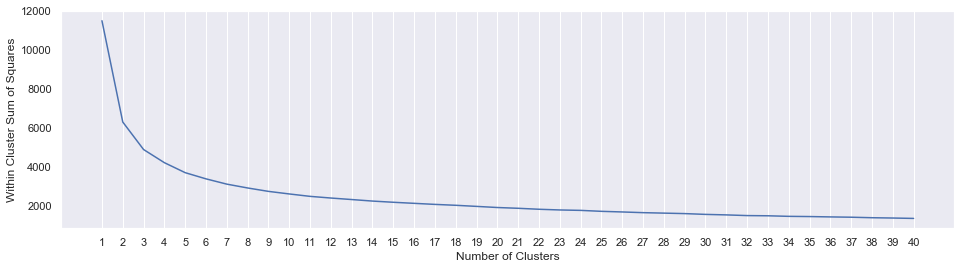

In [37]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(eegBands_class3_df)
    within_ss.append(kmeans.inertia_)
    
# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

### Cluster Breakdown
- Quite a balanced cluster breakdown.
- Clusters 0 and 2 being the majority
- Cluster 4 being the lowest

Cluster 0:	-1.03	-0.78	-0.73	-0.69	-0.75	
Cluster 1:	0.76	0.65	1.49	1.63	1.72	
Cluster 2:	0.12	-0.2	-0.32	-0.38	-0.33	
Cluster 3:	0.62	0.8	0.4	0.29	0.32	
Cluster 4:	1.68	3.13	3.14	3.83	3.06	

Within Cluster Sum of Squares : 3707.1604059641554

DataFrame with Clusters
         Delta     Theta     Alpha      Beta     Gamma Cluster
0     2.571132  1.002036  0.888819  1.032569  2.193982       1
1    -0.255350  0.806711  0.397403  0.174222  0.452493       3
2    -1.659535  0.972491 -0.324135 -0.669616 -1.185950       0
3    -0.843744 -0.934869 -0.959203 -0.680897 -0.564248       0
4     2.567724  0.923711  1.867364  2.859994  1.599160       1
...        ...       ...       ...       ...       ...     ...
2295  1.241687 -0.749358 -0.645419 -0.277003  0.039116       2
2296 -0.290475  1.901855  0.463470  0.936089  0.915776       3
2297  1.730445  0.987851  3.465574  2.204326  4.193062       4
2298  1.346509 -0.475205  0.478601  1.303491  1.838581       1
2299  1.070836  0.929600  0.307628  0.5

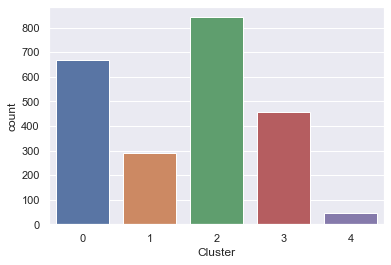

In [38]:
num_clust = 5

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(eegBands_class3_df)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(eegBands_class3_df)

# Append Labels to the Data
eegBand_class3_labeled = eegBands_class3_df.copy()
eegBand_class3_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(eegBand_class3_labeled["Cluster"])

print("DataFrame with Clusters")
print(eegBand_class3_labeled)

### Cluster Class 3 Analysis - Healthy Region
- Cluster 0: Low Freq Bands
- Cluster 1: Moderate/Middle Freq Bands
- Cluster 2: Low Freq Bands
- Cluster 3: Low - Middle Freq Bands
- Cluster 4: Moderate - High Freq Bands

The healthy region has less of a trend and is quite balanced in a sense that there are low and medium freq bands. However there is 1 cluster with higher band waves, cluster 4 - also the lowest count.

In [39]:
# Visualizing Clusters with Parallel Plot
import plotly.express as px

fig = px.parallel_coordinates(eegBand_class3_labeled, color = "Cluster", 
                              labels={"Gamma": "Gamma", "Delta": "Delta", "Alpha": "Alpha",
                                      "Beta": "Beta", "Theta": "Theta", },
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

### Sumary of the 3 Classes
- In general, classes tend to have a moderate to low frequency band.
- Classes also have some anomalies where they have higher band frequencies.
- It can generally be inferred that for the most part, whether it is in a tumor region or a healthy region, the frequencies given out are still slightly similar -> Possibly meaning that the brain is still capable of functioning. 
- Epilepsy cases see a 1/5 that have high band frequencies while the rest are moderate/middle. 
- A cluster of all the classes might provide more insight.

## Custering of Class 1, 2 & 3
- Clustering of all 3 classes as suggested above.
- Data preparation and clustering is done below.
- There will be no need for an elbow graph as our main goal is to see a relationship between Epilepsy and Tumor with the healthy region acting as a neutral. 
- We thereby go with 2 clusters to force a "relationship". 
- Changes might be made after seeing the results.
- A hypothesis might be epilepsy and tumor cases together and healthy regions by itself. That is the best case scenario. 

In [40]:
class1n2n3 = pd.concat([class1data,class2data,class3data],ignore_index = True)
class1n2n3

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0     386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
1    -278 -246 -215 -191 -177 -167 -157 -139 -118  -92  ...  -400  -379  -336   
2    -167 -230 -280 -315 -338 -369 -405 -392 -298 -140  ...   423   434   416   
3     410  451  491  541  581  641  736  757  692  435  ...   415   428   463   
4    -264 -189 -117  -45   20   70  111  143  161  179  ...  -231  -221  -248   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
6895  -61  -71  -77  -74  -74  -72  -72  -76  -77  -76  ...   -51   -58   -68   
6896  -68  -43  -24   -3  -15  -16  -15  -17  -19  -29  ...    87    88    90   
6897    7   30   16   10   17   23   42   31   34   39  ...   190   152   132   
6898  -39  -16  -13  -14  -68  -84  -92  -61  -89  -86  ...  -102   -75   -63   
6899  -40  -25   -9  -12   -2   12    7   19   22   29  ...   121   135   148   

      X173  X174  X175  X176  X177  X178  y  
0      152   157   156   154   143   129  1  
1     -281  -226  -174  -125   -79   -40  1  
2      374   319   268   215   165   103  1  
3      510   562   607   667   748   763  1  
4     -321  -444  -530  -548  -536  -486  1  
...    ...   ...   ...   ...   ...   ... ..  
6895   -88   -98  -101  -102   -99   -96  3  
6896    91    96    98   102   100    91  3  
6897   104    56    41    63   126   193  3  
6898   -44   -66   -49   -34   -31   -52  3  
6899   143   116    86    68    59    55  3  

[6900 rows x 179 columns]

In [41]:
class1n2n3_y = pd.DataFrame(class1n2n3['y'])
class1n2n3_y

y
0     1
1     1
2     1
3     1
4     1
...  ..
6895  3
6896  3
6897  3
6898  3
6899  3

[6900 rows x 1 columns]

Text(0, 0.5, 'Mean band Amplitude')

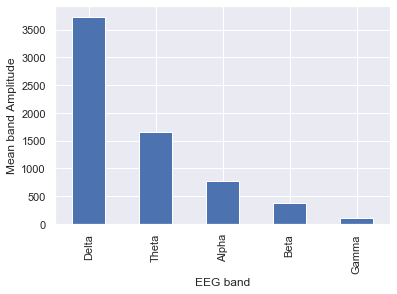

In [42]:
class1n2n3_array = class1n2n3.values  # class 1, 2 & 3 values
fs = 173.61 # Frequency

# Define EEG bands
eegBands_class1n2n3 =  {'Delta': (0, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

rows, cols = (6900, 5) 
count = 0
eegBand_class1n2n3_2dArray = [[0 for i in range(cols)] for j in range(rows)] 
eegBand_class1n2n3_fft = dict()

for i in range (6900):
    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(class1n2n3_array[i]))
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(class1n2n3_array[i]), 1.0/fs)
    # Take the mean of the fft amplitude for each EEG band
    for band in eegBands_class1n2n3: 
        freq_ix = np.where((fft_freq >= eegBands_class1n2n3[band][0]) & 
                           (fft_freq <= eegBands_class1n2n3[band][1]))[0]
        eegBand_class1n2n3_fft[band] = np.mean(fft_vals[freq_ix])
        eegBand_class1n2n3_2dArray[i][count] = eegBand_class1n2n3_fft[band] ##################### 
        count+=1
    count = 0

# Plot the data (using pandas here cause it's easy) This graph is for one entry only.
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eegBands_class1n2n3.keys()
df['val'] = [eegBand_class1n2n3_fft[band] for band in eegBands_class1n2n3]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")



In [43]:
eegBand_class1n2n3_2dArray = StandardScaler().fit_transform(eegBand_class1n2n3_2dArray)
eegBands_class1n2n3_df = pd.DataFrame.from_records(eegBand_class1n2n3_2dArray, columns = ["Delta","Theta","Alpha","Beta","Gamma"])
eegBands_class1n2n3_df

Delta     Theta     Alpha      Beta     Gamma
0     3.256361  2.089671  1.242971  1.858724  1.215443
1     0.111127  0.399339  0.367945 -0.005199  0.059647
2     1.301331  1.722359  1.223516  0.406188 -0.265844
3     0.957159  4.023154  3.125931  0.926034  1.433848
4     0.432911  0.303303 -0.017632 -0.085012  0.335586
...        ...       ...       ...       ...       ...
6895 -0.098698 -0.647094 -0.632765 -0.529142 -0.494105
6896 -0.556510 -0.352045 -0.497012 -0.414911 -0.339876
6897  0.047344 -0.453763 -0.129488 -0.295488  0.236693
6898 -0.067377 -0.616584 -0.495160 -0.380315 -0.177528
6899 -0.149748 -0.460246 -0.516091 -0.449074 -0.481107

[6900 rows x 5 columns]

### Cluster Breakdown
- We can see a majority of the data is in cluster 0.
- The general ratio is 1:6.


Cluster 0:	-0.34	-0.4	-0.41	-0.39	-0.39	
Cluster 1:	1.41	1.66	1.7	1.62	1.63	

Within Cluster Sum of Squares : 13219.114663419079

DataFrame with Clusters


Delta     Theta     Alpha      Beta     Gamma Cluster
0     3.256361  2.089671  1.242971  1.858724  1.215443       1
1     0.111127  0.399339  0.367945 -0.005199  0.059647       0
2     1.301331  1.722359  1.223516  0.406188 -0.265844       1
3     0.957159  4.023154  3.125931  0.926034  1.433848       1
4     0.432911  0.303303 -0.017632 -0.085012  0.335586       0
...        ...       ...       ...       ...       ...     ...
6895 -0.098698 -0.647094 -0.632765 -0.529142 -0.494105       0
6896 -0.556510 -0.352045 -0.497012 -0.414911 -0.339876       0
6897  0.047344 -0.453763 -0.129488 -0.295488  0.236693       0
6898 -0.067377 -0.616584 -0.495160 -0.380315 -0.177528       0
6899 -0.149748 -0.460246 -0.516091 -0.449074 -0.481107       0

[6900 rows x 6 columns]

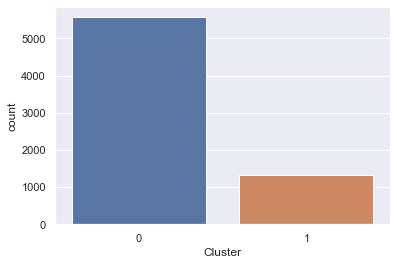

In [44]:
num_clust = 2
# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(eegBands_class1n2n3_df)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(eegBands_class1n2n3_df)

# Append Labels to the Data
eegBand_class1n2n3_labeled = eegBands_class1n2n3_df.copy()
eegBand_class1n2n3_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(eegBand_class1n2n3_labeled["Cluster"])

print("DataFrame with Clusters")
eegBand_class1n2n3_labeled

### Cluster Analysis - Class 1, 2 and 3
- We can see a main trend whereby a majority is in the mid to low frequency bands. (Cluster 0)
- Cluster 1 is in the higher frequency bands.
- Further analysis of the clusters has to be done.

In [45]:
# Visualizing Clusters with Parallel Plot
#print(eegBand_class1n2n3_labeled)
fig_1n2n3 = px.parallel_coordinates(eegBand_class1n2n3_labeled, color = "Cluster", 
                              labels={"Gamma","Delta","Alpha", "Beta","Theta"},
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)
fig_1n2n3.show()

# KIV, too many colours for only 2 clusters

### Futher Cluster Exploration
- A dataframe is created with their actual classes and the clusters that they belong to. 

In [46]:
eegBand_class1n2n3_labeled.insert(loc = 5, column = 'y', value = class1n2n3_y)
pd.set_option('display.max_rows', None)
print(eegBand_class1n2n3_labeled)


         Delta     Theta     Alpha      Beta     Gamma  y Cluster
0     3.256361  2.089671  1.242971  1.858724  1.215443  1       1
1     0.111127  0.399339  0.367945 -0.005199  0.059647  1       0
2     1.301331  1.722359  1.223516  0.406188 -0.265844  1       1
3     0.957159  4.023154  3.125931  0.926034  1.433848  1       1
4     0.432911  0.303303 -0.017632 -0.085012  0.335586  1       0
5    -0.171553  0.295366 -0.152467 -0.155970 -0.488900  1       0
6     1.018687  1.080060  3.555747  2.804805  1.853682  1       1
7     0.019947  1.081775  0.367030  0.192862  0.456055  1       0
8     0.667396 -0.095184  0.376460 -0.015997 -0.502569  1       0
9     0.463902  0.709237  1.664349  5.200910  5.376142  1       1
10    3.333758  0.924755  2.193594  2.837287  2.214677  1       1
11    0.268743 -0.064924 -0.044255  0.246068  0.319189  1       0
12   -0.688879  0.289433  0.211124 -0.252989 -0.501291  1       0
13    1.417046 -0.061248  0.207137  0.610866  0.808722  1       0
14    0.42

In [47]:
eegBand_class1n2n3_labeled.loc[eegBand_class1n2n3_labeled['y'] == 3] 

Delta     Theta     Alpha      Beta     Gamma  y Cluster
4600  0.298543 -0.452184 -0.444940 -0.405826 -0.115003  3       0
4601 -0.546015 -0.473922 -0.505100 -0.486652 -0.421380  3       0
4602 -0.965588 -0.455472 -0.593432 -0.566112 -0.709630  3       0
4603 -0.721828 -0.667739 -0.671179 -0.567174 -0.600254  3       0
4604  0.297525 -0.460901 -0.325144 -0.233747 -0.219649  3       0
4605 -0.649789 -0.545440 -0.622859 -0.546641 -0.459215  3       0
4606 -0.663171 -0.567998 -0.648424 -0.545629 -0.576911  3       0
4607 -0.642756 -0.697825 -0.640806 -0.543871 -0.615700  3       0
4608 -0.641509 -0.521411 -0.428344 -0.374180 -0.466066  3       0
4609 -0.195722 -0.489483 -0.343546 -0.368596 -0.207876  3       0
4610 -0.165156 -0.539683 -0.562530 -0.584005 -0.589509  3       0
4611 -0.560356 -0.550414 -0.485313 -0.494724 -0.618732  3       0
4612 -0.721924 -0.567416 -0.384968 -0.388096 -0.222896  3       0
4613 -0.853406 -0.635191 -0.563026 -0.536898 -0.593872  3       0
4614 -0.417649 -0.450518 -0.642743 -0.539026 -0.450979  3       0
4615 -0.605012 -0.628691 -0.630552 -0.571558 -0.636134  3       0
4616  0.026964 -0.429270 -0.596636 -0.434055 -0.157955  3       0
4617  0.052779 -0.631490 -0.299906 -0.289371 -0.272127  3       0
4618 -0.775199 -0.645042 -0.586750 -0.543596 -0.537909  3       0
4619 -0.491834 -0.511065 -0.585961 -0.551212 -0.571407  3       0
4620 -0.424789 -0.561703 -0.619158 -0.528042 -0.438906  3       0
4621 -0.149732 -0.494935 -0.496961 -0.449779 -0.471839  3       0
4622 -0.848719 -0.492295 -0.544252 -0.521823 -0.571724  3       0
4623 -0.385001 -0.590142 -0.429150 -0.380558 -0.430038  3       0
4624 -0.392724 -0.718117 -0.674005 -0.586746 -0.566944  3       0
4625  0.574154 -0.525903 -0.591170 -0.511794 -0.461361  3       0
4626 -0.499196 -0.684341 -0.618597 -0.561242 -0.614740  3       0
4627 -0.167529 -0.637845 -0.551462 -0.465962 -0.464104  3       0
4628 -0.427472 -0.572710 -0.525094 -0.533519 -0.581905  3       0
4629 -0.615010 -0.690302 -0.678187 -0.573845 -0.607528  3       0
4630 -0.253681 -0.515948 -0.590080 -0.493640 -0.211296  3       0
4631 -0.610003 -0.568784 -0.551988 -0.546327 -0.597829  3       0
4632 -0.387035 -0.499654 -0.619163 -0.514158 -0.495004  3       0
4633 -0.659031 -0.617209 -0.552626 -0.549080 -0.530955  3       0
4634 -0.327992 -0.697240 -0.695110 -0.590269 -0.520411  3       0
4635 -0.785505 -0.695908 -0.655824 -0.593129 -0.686532  3       0
4636 -0.570727 -0.477481 -0.592387 -0.567182 -0.636790  3       0
4637 -0.462603 -0.652364 -0.641198 -0.511881 -0.474949  3       0
4638 -0.958254 -0.649508 -0.672889 -0.587463 -0.661978  3       0
4639 -0.370794 -0.674750 -0.626841 -0.522092 -0.492052  3       0
4640 -0.674778 -0.727093 -0.681250 -0.569845 -0.646922  3       0
4641 -0.435625 -0.584747 -0.653506 -0.542370 -0.476641  3       0
4642 -0.385670 -0.422961 -0.382551 -0.295390 -0.079652  3       0
4643 -0.545737 -0.636350 -0.613075 -0.536761 -0.618202  3       0
4644 -0.548459 -0.686702 -0.655978 -0.591127 -0.647557  3       0
4645 -0.758533 -0.671835 -0.641072 -0.590873 -0.643046  3       0
4646 -0.715556 -0.562109 -0.505926 -0.532900 -0.576701  3       0
4647 -0.503626 -0.503508 -0.619943 -0.530738 -0.481288  3       0
4648 -0.575339 -0.610709 -0.552432 -0.522625 -0.589852  3       0
4649 -0.853123 -0.650505 -0.589329 -0.575597 -0.665504  3       0
4650 -0.360679 -0.738000 -0.659504 -0.584101 -0.503036  3       0
4651 -0.617284 -0.355316 -0.248793 -0.435177 -0.371588  3       0
4652 -0.255271 -0.539801 -0.589615 -0.554355 -0.614796  3       0
4653 -0.596686 -0.578488 -0.612581 -0.532360 -0.610637  3       0
4654 -0.858172 -0.497864 -0.643504 -0.550369 -0.638083  3       0
4655 -0.409034 -0.613995 -0.609955 -0.552040 -0.597517  3       0
4656 -0.841011 -0.679148 -0.698817 -0.586172 -0.674215  3       0
4657 -0.452899 -0.661366 -0.627542 -0.547601 -0.529159  3       0
4658 -0.924946 -0.677581 -0.718204 -0.595258 -0.683089  3       0
4659  0.424900 -0.266255 -0.202657 -0.006701  0.2

In [49]:
print("Cluster 0")
# Class 1 in Cluster 0
y1_c0 = eegBand_class1n2n3_labeled[(eegBand_class1n2n3_labeled['y'] == 1) & (eegBand_class1n2n3_labeled['Cluster'] == 0)]
print("No. of Class 1 \t:", y1_c0.shape[0])

# Class 2 in Cluster 0
y2_c0 = eegBand_class1n2n3_labeled[(eegBand_class1n2n3_labeled['y'] == 2) & (eegBand_class1n2n3_labeled['Cluster'] == 0)]
print("No. of Class 2 \t:", y2_c0.shape[0])

# Class 3 in Cluster 0
y3_c0 = eegBand_class1n2n3_labeled[(eegBand_class1n2n3_labeled['y'] == 3) & (eegBand_class1n2n3_labeled['Cluster'] == 0)]
print("No. of Class 3 \t:", y3_c0.shape[0])
print()

print("Cluster 1")
# Class 1 in Cluster 1
y1_c1 = eegBand_class1n2n3_labeled[(eegBand_class1n2n3_labeled['y'] == 1) & (eegBand_class1n2n3_labeled['Cluster'] == 1)]
print("No. of Class 1 \t:", y1_c1.shape[0])

# Class 2 in Cluster 1
y2_c1 = eegBand_class1n2n3_labeled[(eegBand_class1n2n3_labeled['y'] == 2) & (eegBand_class1n2n3_labeled['Cluster'] == 1)]
print("No. of Class 2 \t:", y2_c1.shape[0])

# Class 3 in Cluster 1
y3_c1 = eegBand_class1n2n3_labeled[(eegBand_class1n2n3_labeled['y'] == 3) & (eegBand_class1n2n3_labeled['Cluster'] == 1)]
print("No. of Class 3 \t:", y3_c1.shape[0])

Cluster 0
No. of Class 1 	: 1005
No. of Class 2 	: 2264
No. of Class 3 	: 2300

Cluster 1
No. of Class 1 	: 1295
No. of Class 2 	: 36
No. of Class 3 	: 0


### Cluster Analysis
- As shown below, we see that cluster 0 is just a mix of the 3 classes. In fact, a majority of the classes of tumor and healthy regions are found in it. A general guess would be that these are frequency bands that are moderate to low - possibly where the brain is still able to function normally. Even in epileptic cases, the brain still retains some function. Or, the epilepsy might not be serious.

According to "Epilepsy Foundation" - https://www.epilepsy.com/start-here/about-epilepsy-basics/what-happens-during-seizure
During a seizure, there are bursts of electrical activity in your brain, sort of like an electrical storm. This activity causes different symptoms depending on the type of seizure and what part of the brain is involved. Seizures can take on many different forms and affect different people in different ways.

**Anything that your brain does normally can also happen during a seizure. For example, your brain helps you move, see, feel and do many other things.** During a seizure, you may move, see, feel or do other things, whether you want to or not!  Also, in some seizures, parts of the brain can still function normally while others can’t.

- As seen in cluster 1 where there are high freq bands - this could be the "burst of electrical activity" that might be significant. It seems from the above data that there are no healthy region data in this cluster meaning that we are able to differentiate between a normal and abnormal activity of the brain. 
- There are 36 cases of tumor frequencies in cluster 1 meaning that they are highly similar to the epilepsy frequencies. A possible hypothesis would be that these tumor cases might be prone to having an epilepsy as their frequencies are so similar.

**With this we can possibly say that we are able to predict a possiblitiy of epilepsy in a person that might not have the seizure yet.**



### Action Plan
- With all these data in mind, we are able to implement a simple code with "incremental clustering".
- This is not incremental clustering per say but more of a **euclidean distance** comparison of the cluster centers.
- To reduce computational time, we only use the 2 cluster centers for new cases that we might wana test for an oncoming epilpesy.
- In the end we would only have 3 data points. 1) Cluster center 0, 2) Cluster center 1, 3) New Data
- The closer the data to any center would just mean that it would join that cluster and be predicted (Possible Epilepsy or No Epilepsy)

In [54]:
# incremental clustering (Euclidean Distance)
from scipy.spatial import distance
clusterCenters = kmeans.cluster_centers_
p1 = eegBands_class1n2n3_df.values[0]
d1 = distance.euclidean(p1, clusterCenters[0])
d2 = distance.euclidean(p1, clusterCenters[1])
if d1 > d2:
    print("Predicted: No Epilepsy", d1, d2)
else:
    print("Predicted: Possible Epilepsy", d1, d2)

Predicted: No Epilepsy 5.424456299090206 2.0102399284260892


### Summary
**Supervised learning**

- We have created models to detect epilepsy succesfully - Avg 97% Accuracy 
- We have create models to detect tumor unsuccesfully - Avg 60% Accuracy

**Unspervised learning**
- We have analyzed cluster, classes data for each class.
- We have created a model to predict possible epilepsy cases.

In general we cannot say that this is 100% accurate, however from our current analysis we are certain that we are going in the right direction and that the models would be able to do the aforementioned jobs.